# Import
First we import the necessary libraries and define functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import gridspec
from gudhi import RipsComplex
from gudhi import AlphaComplex
from gudhi.representations import Entropy
from gudhi.representations import DiagramSelector
import gudhi as gd
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import pairwise_distances
import math
import functions as fu
from scipy.stats import pearsonr,spearmanr

# Load the data. 

It corresponds to 100 point clouds with a time step of 0.1 seconds between each and 30 robots. We have the location of each robot and his angle of view. This data has been extracted from an experiment run of Navground (the software developed by SUPSI in WP3). https://idsia-robotics.github.io/navground/_build/html/index.html

In [2]:
ps = np.load("Robots.npy")
print(ps.shape) # 100 point clound with 30 robots and 3 features(x position, y position, angle view)
instantes=ps.shape[0]
n_robots=ps.shape[1]
radio=2
anguloVision=2*np.pi
minX,maxX = np.min(ps[:,:,0]), np.max(ps[:,:,1])
minY,maxY = np.min(ps[:,:,0]), np.max(ps[:,:,1])

(100, 30, 3)


We need to get the topology right. The topology of the point clouds can be inferred from several filterings, so we will use a fast and sparse (2D) one. First, we need to get an idea of the maximum filtering value to use, which we will approximate with the largest pairwise distance of the point clouds.

In [3]:
ds = [pairwise_distances(X).flatten() for X in ps[:,:,:2]]
maxd = np.max(np.concatenate(ds))
print(maxd)

10.84102


Now we can calculate the topological entropy of dimension 0 for each point cloud, for this we first calculate the persistence diagram, limit the bars that go to infinity and calculate the entropy. Finally we can plot the time series of the topology of how robots are located in each time and how they are moving.

Keep in mind that the first instant will have a very large entropy, or one of the largest, since by default Navground gives them very dispersed at the beginning of the experiment.

P.S: We have created the time series plot in matplotlib and plotly to to know the instants of time that are of interest to study.

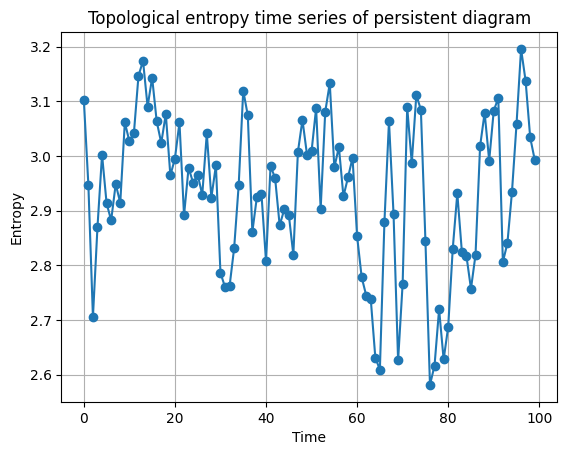

In [72]:
entropias=[]
for i in range(instantes):
    nube_puntos=ps[i,:,:2]
    persistence = fu.calculaDiagramaPersistencia(nube_puntos,0,"alpha")
    persistenciaL = fu.limitaDiagrama(persistence,maxd,remove=True)
    entropias.append(fu.calculaEntropia(persistenciaL))
    
fu.dibujaEntropyTimeSerie(entropias)
fu.dibujaEntropyTimeSerieInteractive(entropias)

It would be interesting to know what it means to have a peak of high/low entropy(for example, the time with biggest entropy: 35; and with the lowest entropy: 57) in terms of this time series, as well as the meaning of little or much entropy differences between two consecutive time instants(for example times 92,93 and 94 marked in red.​

# We compare the time instants of highest and lowest topological entropy.

In [5]:
sorted_indices = np.argsort(entropias)
indices_menores = sorted_indices[:9]
indices_mayores = sorted_indices[-9:]

Point clouds with lower entropy

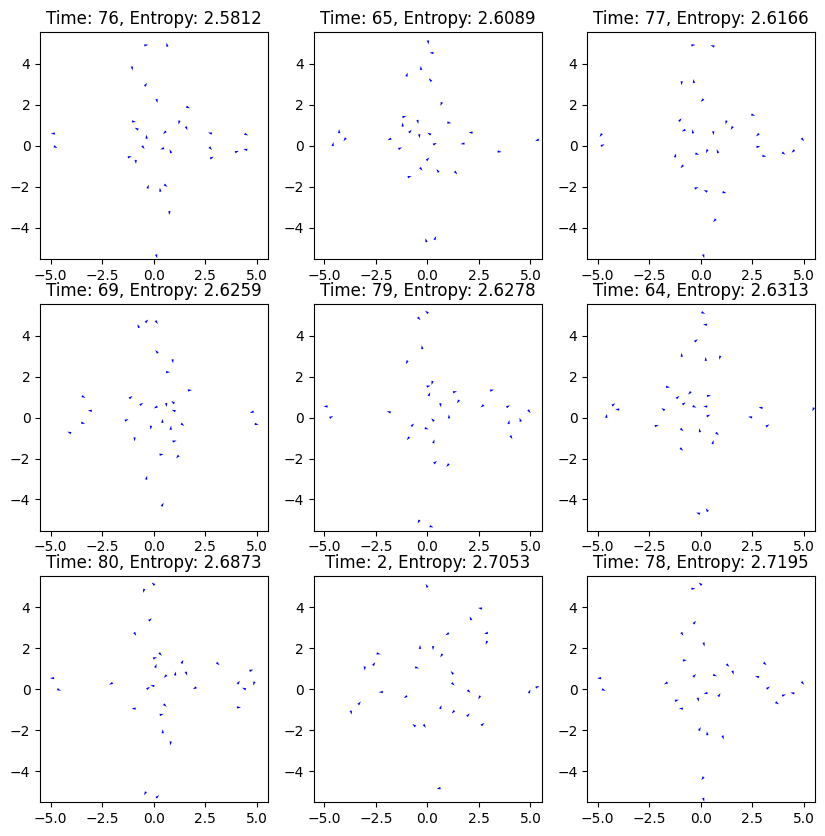

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10)) 
for i in range(3):
    for j in range(3):
        instante = indices_menores[3*i+j]
        axs[i,j].quiver(ps[instante][:,0], ps[instante][:,1], np.cos(ps[instante][:,2]), np.sin(ps[instante][:,2]), color="blue",
            angles='xy', scale_units='xy', scale=5,width=0.01, headwidth=3, headlength=5)
        axs[i,j].set_title(f"Time: {instante}, Entropy: {entropias[instante]}")
for ax in axs.flat:
    ax.set_xlim([minX,maxX])
    ax.set_ylim([minY,maxY])
plt.show()

Point clouds with bigger entropy

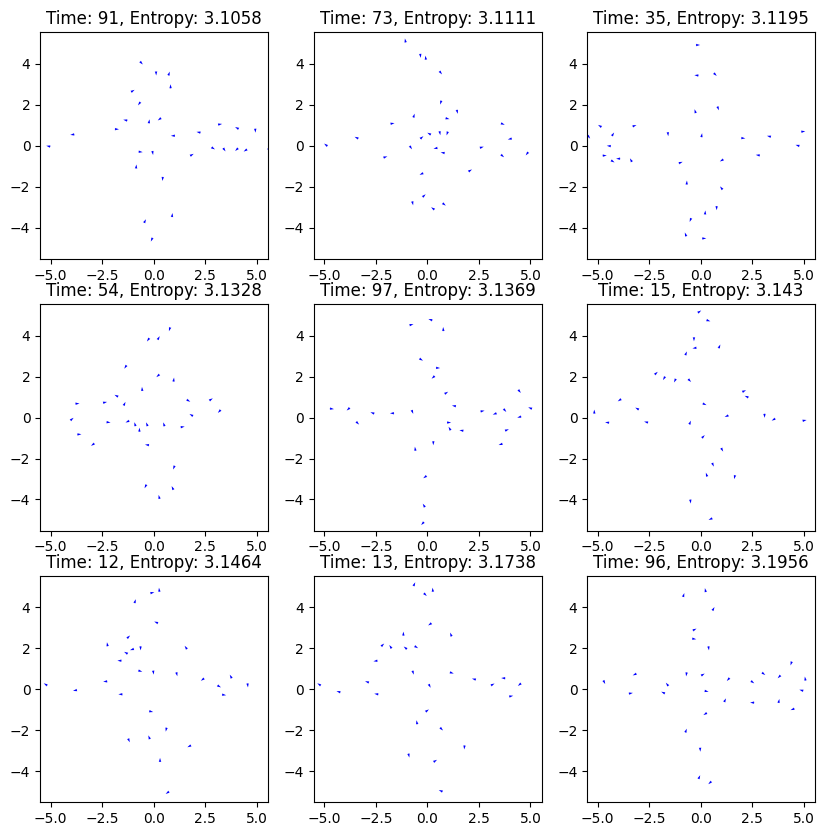

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10)) 
for i in range(3):
    for j in range(3):
        instante = indices_mayores[3*i+j]
        axs[i,j].quiver(ps[instante][:,0], ps[instante][:,1], np.cos(ps[instante][:,2]), np.sin(ps[instante][:,2]), color="blue",
            angles='xy', scale_units='xy', scale=5,width=0.01, headwidth=3, headlength=5)
        axs[i,j].set_title(f"Time: {instante}, Entropy: {entropias[instante]}")
for ax in axs.flat:
    ax.set_xlim([minX,maxX])
    ax.set_ylim([minY,maxY])
plt.show()

If we want to visualize the persistent barcode

In [ ]:
for i in range(9):
    fu.dibujaPersisteceBarcode(indices_menores[i])

In [ ]:
for i in range(9):
    fu.dibujaPersisteceBarcode(indices_mayores[i])

We can say that: 

- Higher entropy:
    - Intervals in the persistence barcode are more evenly distributed in length
    - Suggests greater dispersion among the robots
- Lower entropy:
    - Intervals in the persistence barcode are more uneven distributed
    - Suggests that some robots form a group

# Comparing entropy difference between two consecutive time periods

Comparing times with very slight entropy change (92 and 93):

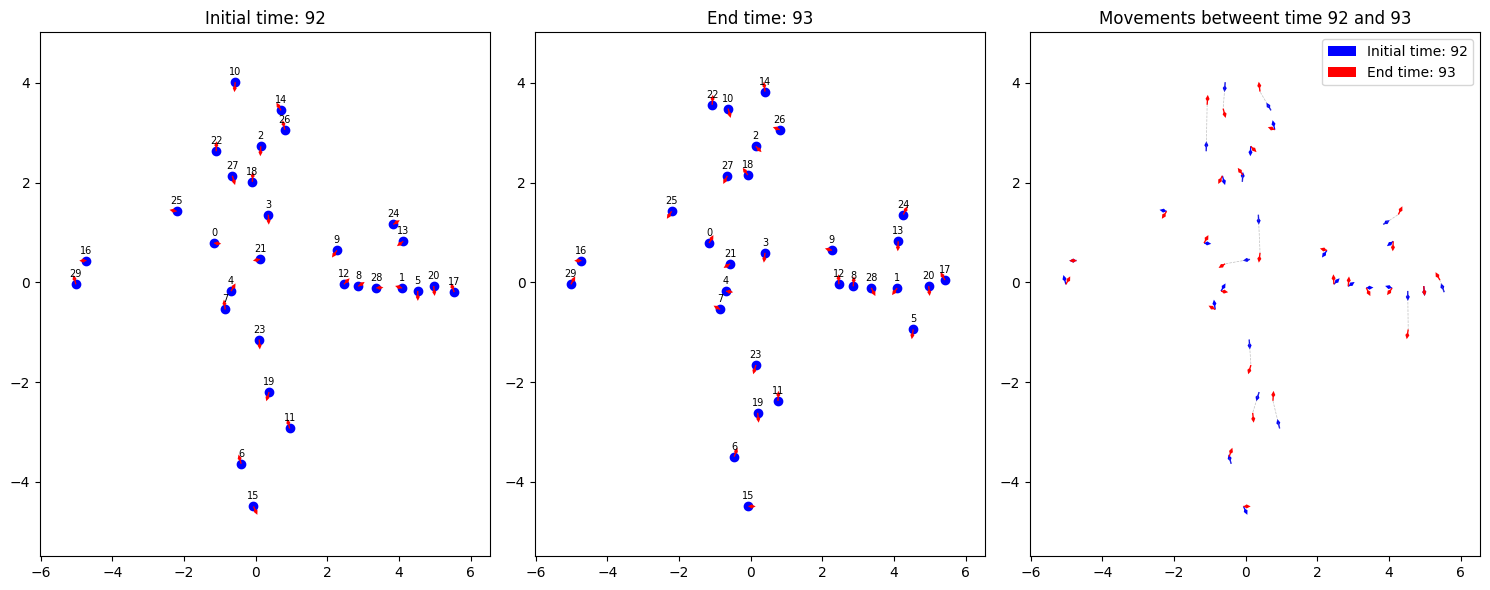

The total distance moved between the instances 92 and 93 is 6.768355546360815 with an average per robot of: 0.22561185154536054 and with a median per robot of: 0.000304014418036978


In [8]:
time1=92
time2=93
fu.dibujaNubePuntos2Instantes(time1,time2)
distances=[]
for i in range(n_robots):
    x1=ps[time1,i,0]
    y1=ps[time1,i,1]
    x2=ps[time2,i,0]
    y2=ps[time2,i,1]
    distancia=fu.calculate_distance(x1,y1,x2,y2)
    distances.append(distancia)
print(f"The total distance moved between the instances {time1} and {time2} is {sum(distances)} with an average per robot of: {np.mean(distances)} and with a median per robot of: {np.median(distances)}")

Comparing times with larger entropy change (93 and 94):

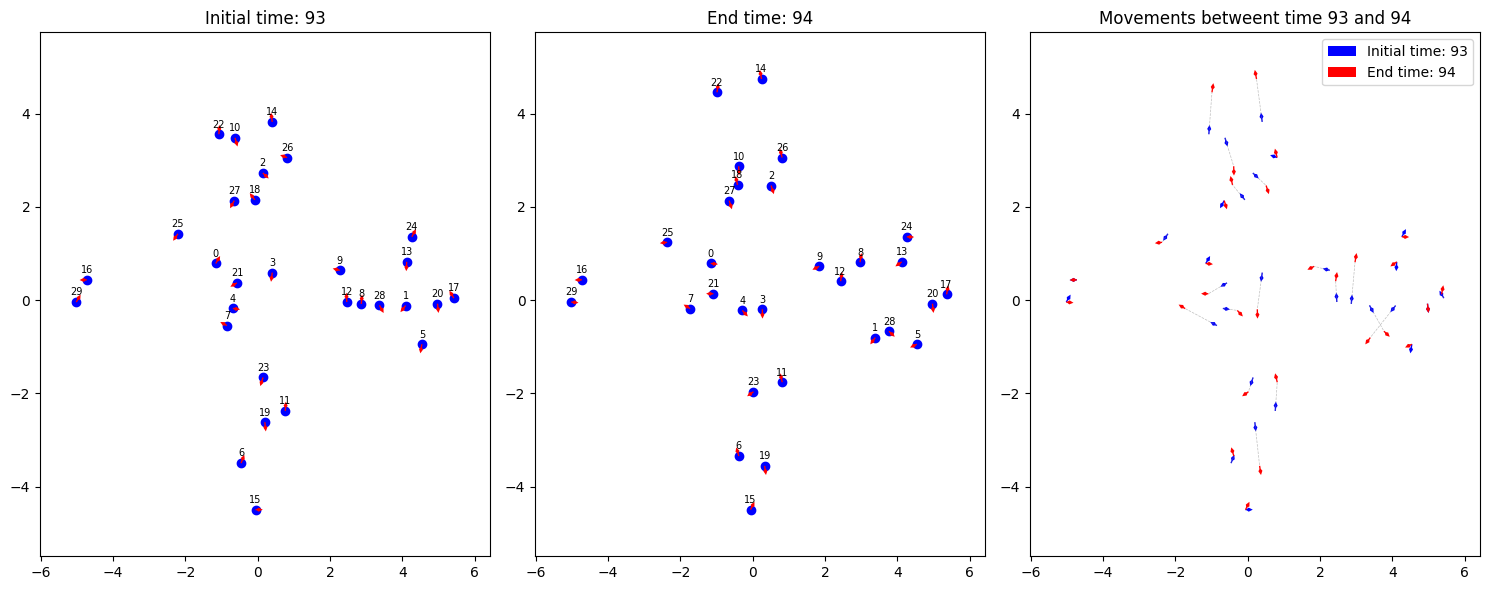

The total distance moved between the instances 93 and 94 is 11.99650175703991 with an average per robot of: 0.39988339190133027 and with a median per robot of: 0.42110094496955125


In [9]:
time1=93
time2=94
fu.dibujaNubePuntos2Instantes(time1,time2)
distances=[]
for i in range(n_robots):
    x1=ps[time1,i,0]
    y1=ps[time1,i,1]
    x2=ps[time2,i,0]
    y2=ps[time2,i,1]
    distancia=fu.calculate_distance(x1,y1,x2,y2)
    distances.append(distancia)
print(f"The total distance moved between the instances {time1} and {time2} is {sum(distances)} with an average per robot of: {np.mean(distances)} and with a median per robot of: {np.median(distances)}")

Another example: Low difference in entropy between times 31 and 32 and bigger difference between times 32 and 33

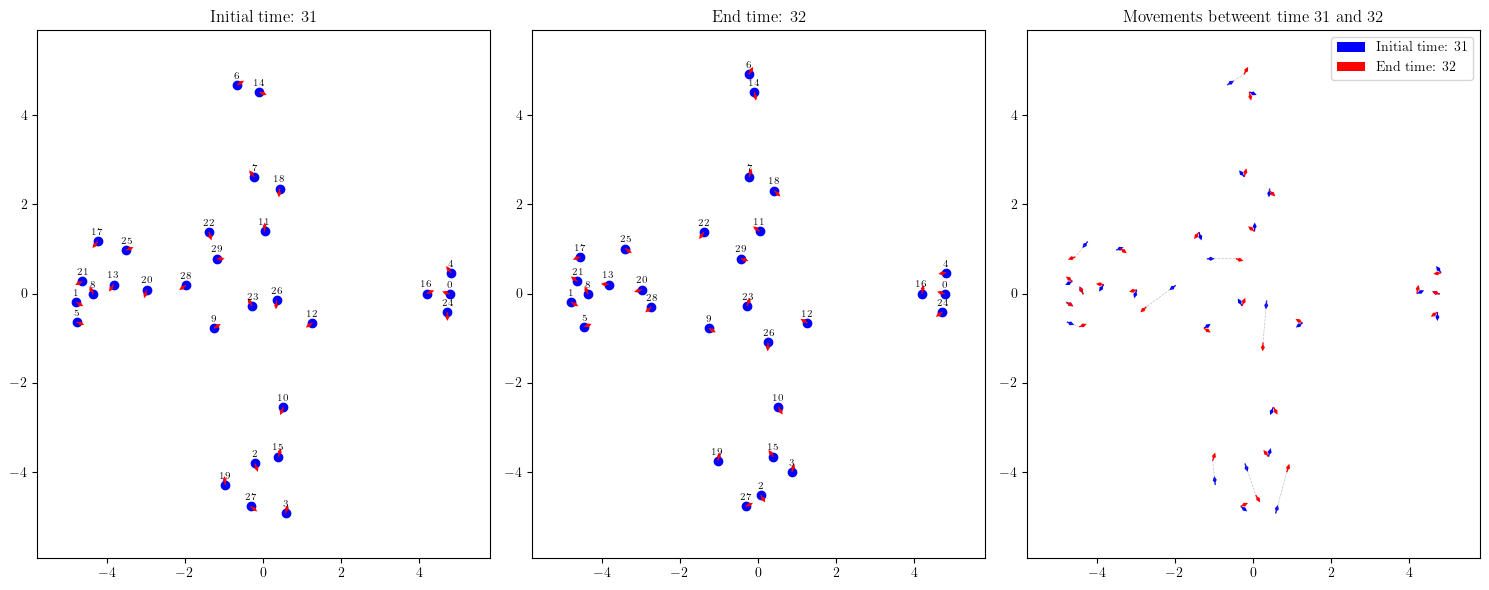

The total distance moved between the instances 31 and 32 is 6.3170392984868995 with an average per robot of: 0.21056797661623 and with a median per robot of: 2.3207599376109654e-05


In [12]:
time1=31
time2=32
fu.dibujaNubePuntos2Instantes(time1,time2)
distances=[]
for i in range(n_robots):
    x1=ps[time1,i,0]
    y1=ps[time1,i,1]
    x2=ps[time2,i,0]
    y2=ps[time2,i,1]
    distancia=fu.calculate_distance(x1,y1,x2,y2)
    distances.append(distancia)
print(f"The total distance moved between the instances {time1} and {time2} is {sum(distances)} with an average per robot of: {np.mean(distances)} and with a median per robot of: {np.median(distances)}")

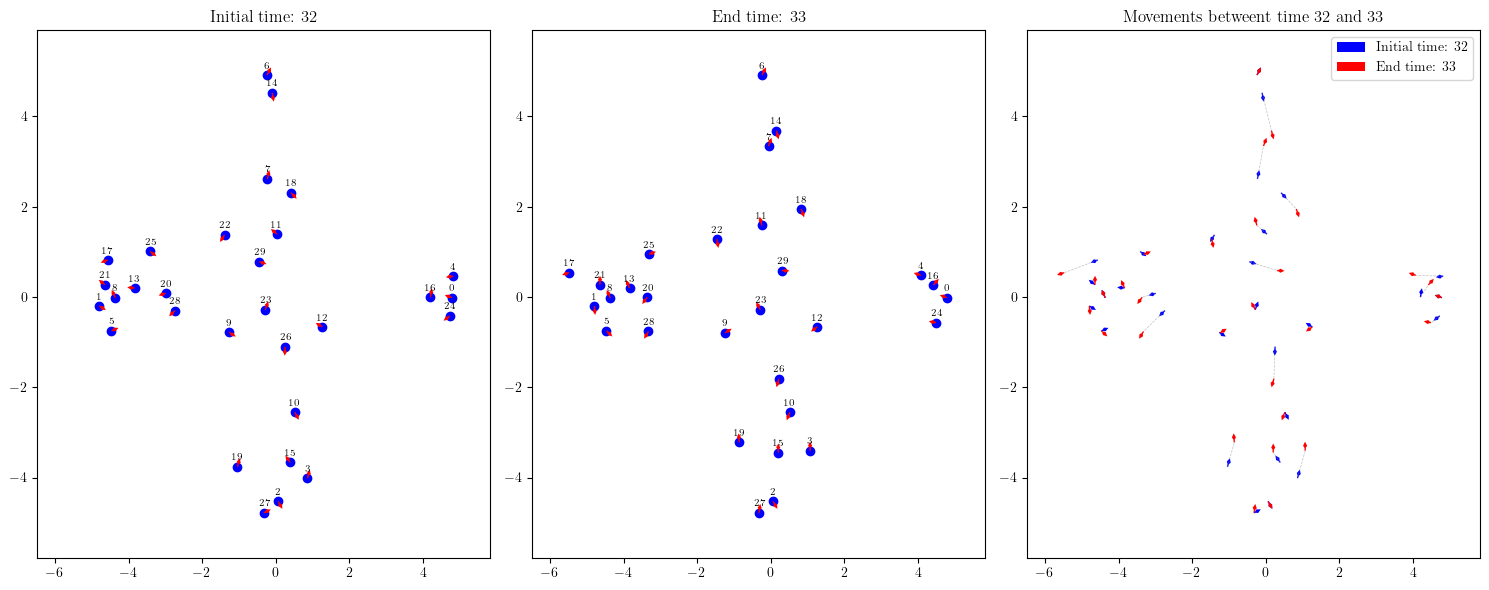

The total distance moved between the instances 32 and 33 is 9.215737576270687 with an average per robot of: 0.3071912525423563 and with a median per robot of: 0.2005274979885156


In [13]:
time1=32
time2=33
fu.dibujaNubePuntos2Instantes(time1,time2)
distances=[]
for i in range(n_robots):
    x1=ps[time1,i,0]
    y1=ps[time1,i,1]
    x2=ps[time2,i,0]
    y2=ps[time2,i,1]
    distancia=fu.calculate_distance(x1,y1,x2,y2)
    distances.append(distancia)
print(f"The total distance moved between the instances {time1} and {time2} is {sum(distances)} with an average per robot of: {np.mean(distances)} and with a median per robot of: {np.median(distances)}")

- Comparing times with very slight entropy 
    - Little to no movement of the robots
    - Suggests minimal change in position
- Comparing times with larger entropy change
    -  Significant movement and position change of the robots
    - Indicates a sharp change in entropy
- Conclusion:
    - Greater difference in entropy between two instants seems to imply more movement and position change of the robots.

If we study the correlation between the entropy changes and the total motion distance between two instants of time:

In [73]:
entropyChange=[]
totalMoveDistance=[]
medianMoveDistance=[]
for j in range(instantes-1):
    time1=j
    time2=j+1
    distances=[]
    for i in range(n_robots):
        x1=ps[time1,i,0]
        y1=ps[time1,i,1]
        x2=ps[time2,i,0]
        y2=ps[time2,i,1]
        distancia=fu.calculate_distance(x1,y1,x2,y2)
        distances.append(distancia)
    totalMoveDistance.append(sum(distances))
    medianMoveDistance.append(np.median(distances))
    entropyChange.append(abs(entropias[time2]-entropias[time1]))

corr, p_value = spearmanr(entropyChange, totalMoveDistance)

print(f"Spearman's correlation coefficient between entropy change and distance change : {corr}")
print(f"P-value {p_value}")

corr, p_value = spearmanr(entropyChange, medianMoveDistance)

print(f"Spearman's correlation coefficient between entropy change and median distance change : {corr}")
print(f"P-value {p_value}")

Spearman's correlation coefficient between entropy change and distance change : 0.06483651723387582
P-value 0.5237383433749412
Spearman's correlation coefficient between entropy change and median distance change : -0.01643176519366731
P-value 0.8717559434932554


It appears that the preliminary findings are not significant, i.e. it is not significant that a larger entropy change between two consecutive time instants implies a larger total robot movement.

All this has been used to explain the situation of robots at a given instant of time and its relation to entropy, but what if we calculate the persistent entropy of a robot only with those within its field of view, so that this is able to explain future movements. Let's look at an example where we calculate the robots that are within the field of view of a robot.

Time 0. Robots in the robot's 0 field of vision: [3, 4, 11, 12, 21, 22, 23, 25, 29]


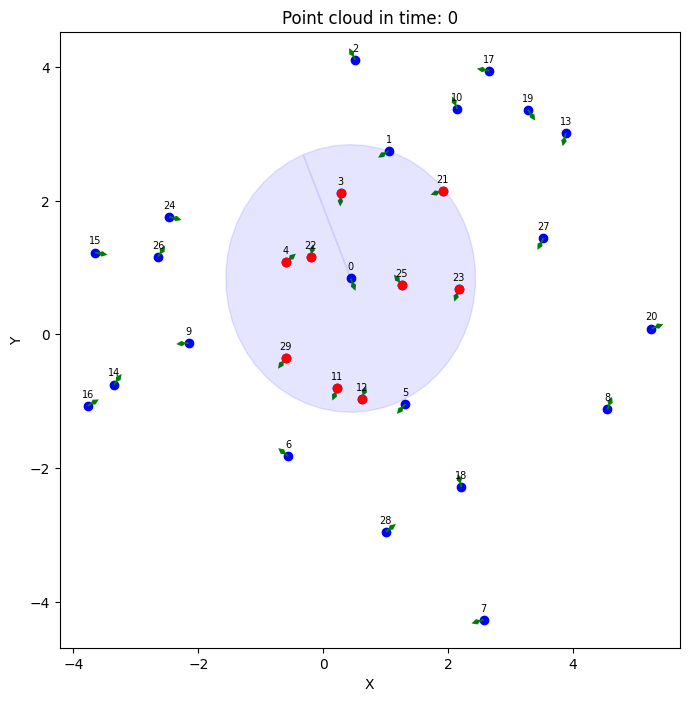

Persistent entropy: 1.9346


In [54]:
time=0
robot=0
instante = ps[time]
x=instante[:,0]
y=instante[:,1]
angle=instante[:,2]
fu.dibujaNubePuntosInstante(time,robot,radio,anguloVision,ids=True)
robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision,printing=True)
plt.scatter(x[robots], y[robots],color="red")
plt.show()
robots.append(robot)
puntos=ps[0,robots,:2]
x=fu.calculaDiagramaPersistencia(puntos,0)
xL = DiagramSelector(use=True).fit_transform([x]) 
entropia = fu.calculaEntropia(xL[0])
print(f"Persistent entropy: {entropia}")


Time 0. Robots in the robot's 27 field of vision: [13, 19, 21, 23]


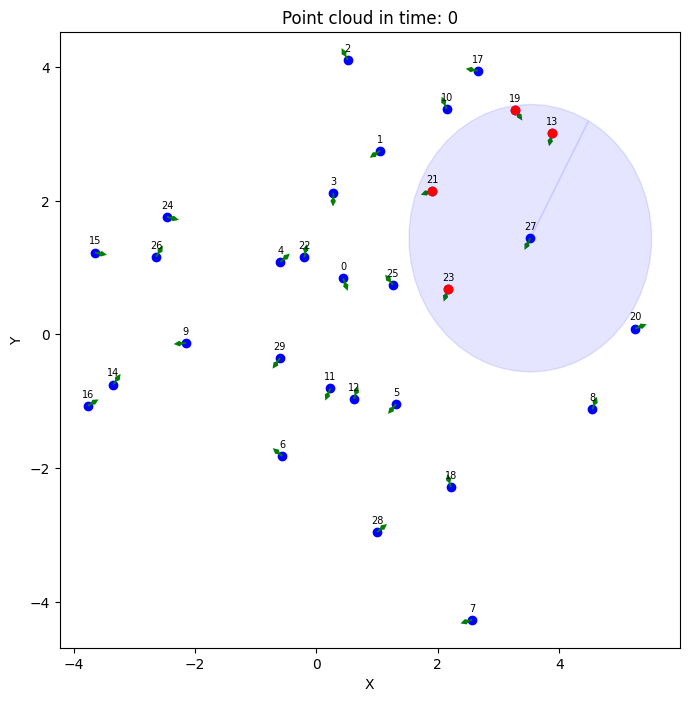

Persistent entropy: 1.2637


In [53]:
time=0
robot=27
instante = ps[time]
x=instante[:,0]
y=instante[:,1]
angle=instante[:,2]
fu.dibujaNubePuntosInstante(time,robot,radio,anguloVision,ids=True)
robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision,printing=True)
plt.scatter(x[robots], y[robots],color="red")
plt.show()
robots.append(robot)
puntos=ps[0,robots,:2]
x=fu.calculaDiagramaPersistencia(puntos,0)
xL = DiagramSelector(use=True).fit_transform([x]) 
entropia = fu.calculaEntropia(xL[0])
print(f"Persistent entropy: {entropia}")

Time 0. Robots in the robot's 3 field of vision: [0, 1, 4, 21, 22, 25]


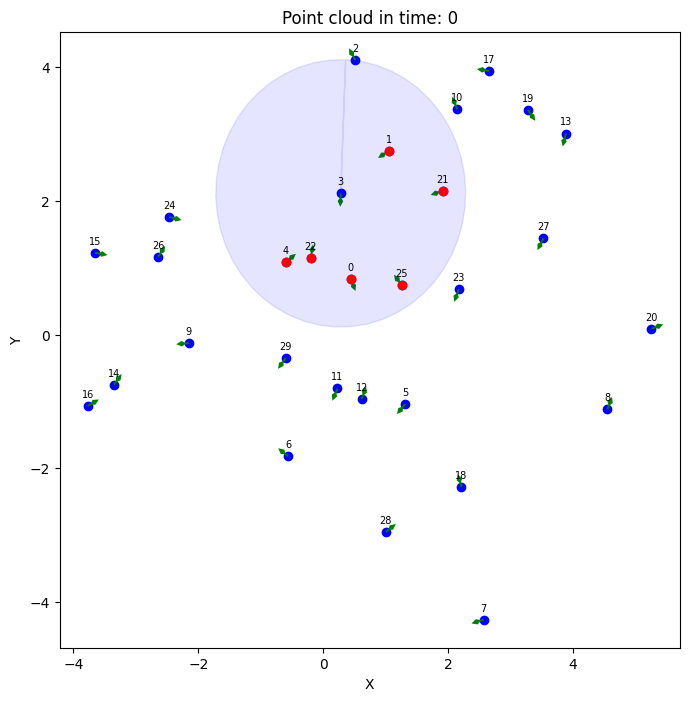

Persistent entropy: 1.664


In [47]:
time=0
robot=3
instante = ps[time]
x=instante[:,0]
y=instante[:,1]
angle=instante[:,2]
fu.dibujaNubePuntosInstante(time,robot,radio,anguloVision,ids=True)
robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision,printing=True)
plt.scatter(x[robots], y[robots],color="red")
plt.show()
robots.append(robot)
puntos=ps[0,robots,:2]
x=fu.calculaDiagramaPersistencia(puntos,0)
xL = DiagramSelector(use=True).fit_transform([x]) 
entropia = fu.calculaEntropia(xL[0])
print(f"Persistent entropy: {entropia}")

We can observe how the more robots in the field of view there is a higher entropy, so a higher entropy for the field of view of a robot can mean greater difficulties to move. On the other hand, the lower the entropy the opposite, the clearer the path to where it is looking.

In [58]:
for j in range(instantes-1):
    entropiasRobots=[]
    distanceMove=[]
    for i in range(n_robots):
        time=j
        robot=i
        instante = ps[time]
        x=instante[:,0]
        y=instante[:,1]
        angle=instante[:,2]
        robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision)
        if len(robots) == 0:
            entropiasRobots.append(0)
        else:
            robots.append(robot)
            puntos=ps[time,robots,:2]
            x=fu.calculaDiagramaPersistencia(puntos,0)
            xL = DiagramSelector(use=True).fit_transform([x]) 
            entropia = fu.calculaEntropia(xL[0])
            entropiasRobots.append(entropia)
        time1=j
        time2=j+1
        x1=ps[time1,i,0]
        y1=ps[time1,i,1]
        x2=ps[time2,i,0]
        y2=ps[time2,i,1]
        distancia=fu.calculate_distance(x1,y1,x2,y2)
        distanceMove.append(distancia)
    corr, p_value = spearmanr(entropiasRobots, distanceMove)
    if p_value < 0.05:
        print(f"\033[92mSignificant!, correlation {corr}\033[0m")
    else:
        print(f"\033[91mNo significant, correlation {corr}\033[0m")

Significant!, correlation -0.3904178878838492
No significant, correlation -0.041782577535464015
No significant, correlation -0.06849065130715828
No significant, correlation 0.1726909736686562
No significant, correlation 0.06101770442011402
No significant, correlation -0.19944255468674396
No significant, correlation 0.1924448597679649
No significant, correlation 0.1119902050184162
No significant, correlation -0.15346921449093165
No significant, correlation -0.13232195256649765
No significant, correlation 0.12069174729924886
No significant, correlation -0.011143307302813385
Significant!, correlation 0.430147101534685
No significant, correlation 0.03585801713065013
No significant, correlation 0.1300615317476194
No significant, correlation 0.09047308191384679
Significant!, correlation 0.5648012562119491
No significant, correlation 0.24426109001397414
No significant, correlation 0.3299402528671966
No significant, correlation -0.17510568190006678
No significant, correlation -0.01686210598683

And if we studied the correlation depending on the number of robots in the field of view. This makes more sense since the entropy created by taking into account different numbers of points in its calculation is not comparable. **Obviously if one robots does not have any robot or only one in his field of vision it would be nan because the entropy is 0. For 15 robots in field of vision is the same because there is only one case of it, so correlation is nan.**

In [61]:
entropiasRobots=[]
distanceMove=[]
robotsVision=[]
for j in range(instantes-1):
    for i in range(n_robots):
        time=j
        robot=i
        instante = ps[time]
        x=instante[:,0]
        y=instante[:,1]
        angle=instante[:,2]
        robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision)
        robotsVision.append(len(robots))
        if len(robots) == 0:
            entropiasRobots.append(0)
        else:
            robots.append(robot)
            puntos=ps[time,robots,:2]
            x=fu.calculaDiagramaPersistencia(puntos,0)
            xL = DiagramSelector(use=True).fit_transform([x]) 
            entropia = fu.calculaEntropia(xL[0]) 
            entropiasRobots.append(entropia)
        time1=j
        time2=j+1
        x1=ps[time1,i,0]
        y1=ps[time1,i,1]
        x2=ps[time2,i,0]
        y2=ps[time2,i,1]
        distancia=fu.calculate_distance(x1,y1,x2,y2)
        distanceMove.append(distancia)

for i in np.unique(robotsVision):
    print(f"{i} robots in the field of vision")
    indices = np.where(np.array(robotsVision) == i)[0]
    corr, p_value = spearmanr(np.array(entropiasRobots)[indices], np.array(distanceMove)[indices])
    if p_value < 0.05:
        print(f"\033[92mSignificant!, correlation {corr}\033[0m")
    else:
        print(f"\033[91mNo significant, correlation {corr}\033[0m")

0 robots in the field of vision
No significant, correlation nan
1 robots in the field of vision
No significant, correlation nan
2 robots in the field of vision
Significant!, correlation 0.2045873461362953
3 robots in the field of vision
No significant, correlation 0.10083124841213499
4 robots in the field of vision
No significant, correlation 0.025534019377669907
5 robots in the field of vision
No significant, correlation -0.08442803982613281
6 robots in the field of vision
No significant, correlation 0.033011973906900624
7 robots in the field of vision
No significant, correlation 0.013741540684984725
8 robots in the field of vision
Significant!, correlation -0.13676811160605687
9 robots in the field of vision
No significant, correlation -0.09851704755587201
10 robots in the field of vision
No significant, correlation 0.05494913252671749
11 robots in the field of vision
No significant, correlation 0.04575046314084145
12 robots in the field of vision
Significant!, correlation 0.35961462

We have significant evidence(in the initial state for example) that the more entropy a robot has in its field of view, the less it will move next, but with a persistent lower entropy in its field of view, it will tend to move more at the initial moment but the correlation will change. This seems to indicate that the initial state created by Navground presents greater entropy due to greater dispersion, as Jerome commented, as well as a significant inverse correlation between these two variables that tends to cancel out, but it is not a common pattern at all time instants, since at some instants the correlation is significantly positive, i.e. the higher the entropy of a robot and its field of view, the greater the motion. **The common pattern is no relationship between these two variables.**

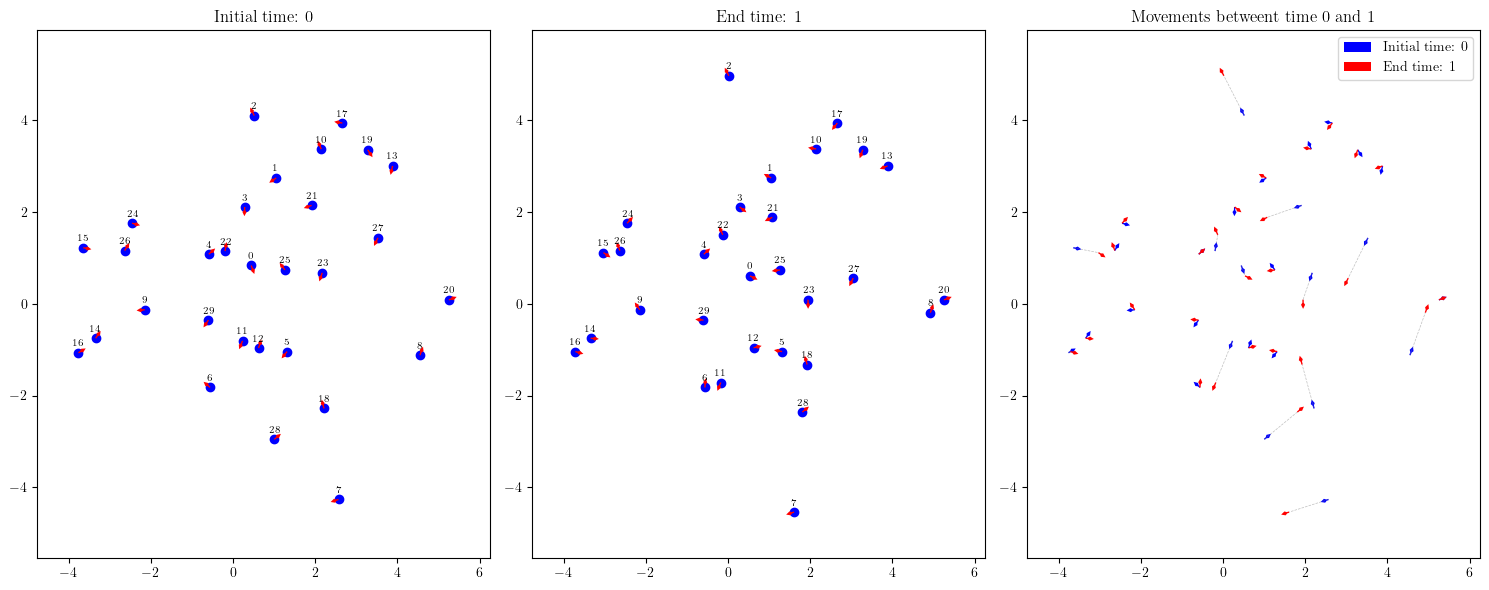

In [19]:
fu.dibujaNubePuntos2Instantes(0,1)

In this generate gif, we can see the path a robot takes, as well as its field of vision. We calculate his topological entropy in each time respecting the robots in his field of vision

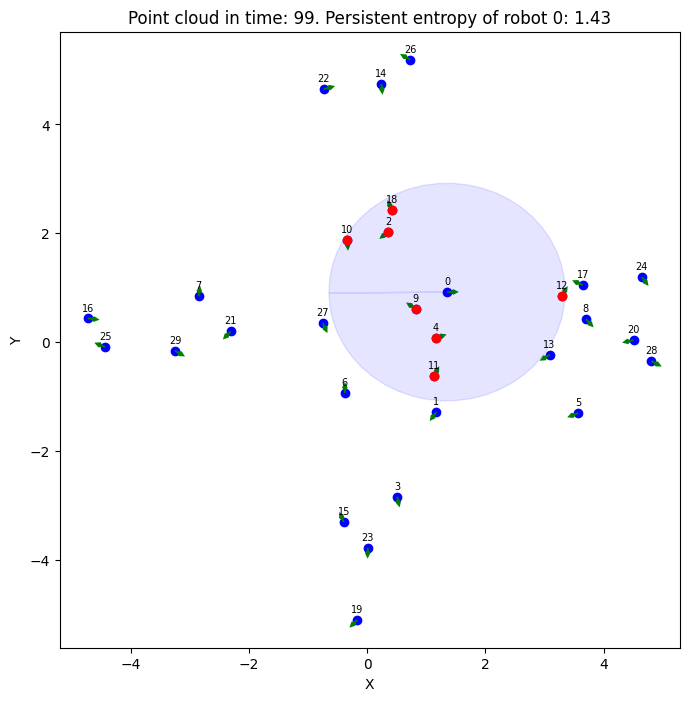

In [ ]:
ids = True
robotVision = 0  #robot ID which will display his field vision

def update(frame):
    plt.clf() 
    instante = ps[frame]
    x = instante[:, 0]
    y = instante[:, 1]
    angle = instante[:, 2]

    plt.scatter(x, y, color='blue', label=f"Initial time: {frame}")
    plt.quiver(x, y, np.cos(angle), np.sin(angle), color="green",
               angles='xy', scale_units='xy', scale=5, width=0.003, headwidth=3, headlength=3)
    
    if ids:
        for i in range(len(x)):
            plt.text(x[i], y[i]+0.1, str(i), fontsize=7, ha='center', va='bottom')
    
    if robotVision is not None:
        plt.scatter(x[robotsVision], y[robotsVision],color="green")
        vision_radius = radio
        field_of_view = anguloVision
        xrobot = x[robotVision]
        yrobot = y[robotVision]
        orientation = angle[robotVision]
        arc_points = [[xrobot, yrobot]]

        num_points = 50
        for i in range(num_points + 1):
            angulos = orientation + field_of_view / 2 - (i / num_points) * field_of_view
            arc_points.append([xrobot + vision_radius * np.cos(angulos), yrobot + vision_radius * np.sin(angulos)])
        arc_points.append([xrobot, yrobot])
        arc_points = np.array(arc_points)
        # plt.plot(arc_points[:, 0], arc_points[:, 1], 'b-', alpha=0.3)
        plt.fill(arc_points[:, 0], arc_points[:, 1], color='blue', alpha=0.1)
    robots=fu.calculate_robots_in_field_vision(frame,robotVision,radio,anguloVision,)
    plt.scatter(x[robots], y[robots],color="red")
    robots.append(robotVision)
    puntos=ps[frame,robots,:2]
    x=fu.calculaDiagramaPersistencia(puntos,0)
    xL = DiagramSelector(use=True).fit_transform([x]) 
    if len(robots) < 3:
        entropia = None
    else:
        entropia = fu.calculaEntropia(xL[0])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Point cloud in time: {frame}. Persistent entropy of robot {robotVision}: {entropia}')

fig = plt.figure(figsize=(8, 8))
ani = animation.FuncAnimation(fig, update, frames=100, interval=1000)
ani.save(filename="RobotMovementVision.gif", writer="pillow")
plt.show()

With plotly instead matplotlib generating a html.

In [63]:
time_range = range(ps.shape[0]) 
ids = True  # Si quieres mostrar las IDs
robotVision = 0  # Indice del robot para mostrar el arco de visión
x_axis_range = [np.min(ps[:,:,0])-0.5, np.max(ps[:,:,0])+0.5] 
y_axis_range = [np.min(ps[:,:,1])-0.5, np.max(ps[:,:,1])+0.5]
entropias=[]
# Crear la figura
fig = go.Figure()

# Añadir frames
frames = []
for time in time_range:
    instante = ps[time]
    x = instante[:, 0]
    y = instante[:, 1]
    angle = instante[:, 2]

    # Scatter plot para puntos
    scatter = go.Scatter(x=x, y=y, mode='markers', marker=dict(color='blue'), showlegend=False)

    # Quiver plot para vectores
    quiver = ff.create_quiver(x, y, np.cos(angle), np.sin(angle), showlegend=False)
    annotations = []

    vision_arc = None
    if robotVision is not None:
        vision_radius = radio
        field_of_view = anguloVision
        xrobot = x[robotVision]
        yrobot = y[robotVision]
        orientation = angle[robotVision]
        arc_points = [[xrobot, yrobot]]
        num_points = 50
        for i in range(num_points + 1):
            angulos = orientation + field_of_view / 2 - (i / num_points) * field_of_view
            arc_points.append([xrobot + vision_radius * np.cos(angulos), yrobot + vision_radius * np.sin(angulos)])
        arc_points.append([xrobot, yrobot])
        arc_points = np.array(arc_points)

        vision_arc = go.Scatter(x=arc_points[:, 0], y=arc_points[:, 1], mode='none',
                                fill='toself', fillcolor='rgba(0,0,255,0.05)', showlegend=False)

    # Crear el frame y añadirlo a la lista de frames
    frame_data = [scatter] + list(quiver.data)
    if vision_arc:
        frame_data.append(vision_arc)
    robots=fu.calculate_robots_in_field_vision(time,robotVision,radio,anguloVision,)
    for i in range(len(x)):
        if i in robots:
            annotations.append(dict(
                x=x[i],
                y=y[i]+0.3,
                text=str(i),
                showarrow=False,
                font=dict(color='red')
            ))
        else:
            annotations.append(dict(
                x=x[i],
                y=y[i]+0.3,
                text=str(i),
                showarrow=False,
                font=dict(color='blue')
            ))
    # scatter2 = go.Scatter(x=x[robots], y=y[robots], mode='markers', marker=dict(color='red'), showlegend=False)
    # frame_data.append(scatter2)
    robots.append(robotVision)
    puntos=ps[time,robots,:2]
    x=fu.calculaDiagramaPersistencia(puntos,0)
    xL = DiagramSelector(use=True).fit_transform([x]) 
    if len(robots) < 3:
        entropia = None
    else:
        entropia = fu.relative_entropy(xL[0])
    frames.append(go.Frame(data=frame_data, name=str(time), layout=dict(annotations=annotations, title=f'Point cloud in time: {time}. Persistent entropy of robot {robotVision}: {entropia}')))

fig.update(frames=frames)

initial_frame = frames[0]
fig.add_traces(initial_frame.data)
fig.update_layout(
    xaxis_title='X',
    yaxis_title='Y',
    hovermode='closest',
    width=800,
    height=800,
    xaxis=dict(range=x_axis_range, showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(range=y_axis_range, showline=True, linewidth=2, linecolor='black'),
    # paper_bgcolor='white',  # Fondo blanco para toda la figura
    plot_bgcolor='white',
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }]
)

fig.update_layout(sliders=[{
    "steps": [
        {
            "args": [[f.name], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
            "label": f.name,
            "method": "animate"
        } for f in frames
    ],
    "transition": {"duration": 0},
    "x": 0.1,
    "len": 0.9
}])

fig.write_html('RobotMovementPlotly.html')
fig.show()

 The problem is that using the alpha complex or vietoris rips does not make much sense in this case, so we will use the lower stair filtering, for this we must first, have a kind of time series of the robots in the field of view, where the x-axis is the first seen (we will use more proximity in how much angle between 0 and 180 degrees) and the y-axis the distance.

In [69]:
def transform_angle(angulo):
    if angulo < 0:
        anguloFinal = angulo + 360
    else:
        anguloFinal = angulo
    return anguloFinal

entropiasRobotsTotal=[]
distanceMoveTotal=[]
for j in range(instantes-1):
    entropiasRobots=[]
    distanceMove=[]
    for i in range(n_robots):
        time=j
        robot=i
        instante = ps[time]
        x=instante[:,0]
        y=instante[:,1]
        angle=instante[:,2]
        robots=fu.calculate_robots_in_field_vision(time,robot,radio,anguloVision)
        if len(robots) == 0:
            entropiasRobots.append(0)
            entropiasRobotsTotal.append(0)
        else:
            ids=[]
            angulos=[]
            distancias=[]
            for i in robots:
                x1=x[robot]
                y1=y[robot]
                angle1=angle[robot]
                x2=x[i]
                y2=y[i]
                angulo=np.rad2deg(fu.calculate_angle(x1,y1,angle1,x2,y2))
                anguloFinal=transform_angle(angulo)
                distancia=fu.calculate_distance(x1,y1,x2,y2)
                ids.append(i)
                angulos.append(anguloFinal)
                distancias.append(distancia)
            indices_ordenados = np.argsort(angulos)
            dgms = fu.calculate_lowerStair_PDs(np.arange(0,len(distancias)),np.array(distancias)[indices_ordenados])
            dgm0 = fu.diagram_lowerstair_dimension(dgms,0)
            maximaFiltracion=max(distancias)
            dgm0L = fu.limitaDiagrama(dgm0,maximaFiltracion)
            entropia = fu.calculaEntropia(dgm0L)
            entropiasRobots.append(entropia)
            entropiasRobotsTotal.append(entropia)

        time1=j
        time2=j+1
        x1=ps[time1,i,0]
        y1=ps[time1,i,1]
        x2=ps[time2,i,0]
        y2=ps[time2,i,1]
        distancia=fu.calculate_distance(x1,y1,x2,y2)
        distanceMove.append(distancia)
        distanceMoveTotal.append(distancia)
    corr, p_value = spearmanr(entropiasRobots, distanceMove)
    if p_value < 0.05:
        print(f"\033[92mSignificant!, correlación {corr}\033[0m")
    else:
        print(f"\033[91mNo significant, , correlación {corr}\033[0m")
corr, p_value = spearmanr(entropiasRobotsTotal, distanceMoveTotal)
if p_value < 0.05:
    print(f"\033[92mSignificant!, correlation {corr}\033[0m")
else:
    print(f"\033[91mNo significant, correlation {corr}\033[0m")

Significant!, correlación -0.3917587359069489
Significant!, correlación 0.4386543484028057
No significant, , correlación 0.3543481124440542
Significant!, correlación 0.4041420864610516
No significant, , correlación 0.19372532646816437
No significant, , correlación -0.010159008121189111
No significant, , correlación 0.23223827579661602
No significant, , correlación 0.27261180381165084
No significant, , correlación -0.012860584471768948
No significant, , correlación 0.06848052447563802
No significant, , correlación -0.07995514861732846
No significant, , correlación -0.06936785538204583
Significant!, correlación 0.504440333181235
No significant, , correlación 0.1912412630288281
No significant, , correlación 0.08809147387100152
No significant, , correlación -0.07270522330045111
Significant!, correlación 0.3783938170849473
No significant, , correlación -0.06866530071802183
No significant, , correlación -0.01051326501039153
Significant!, correlación -0.37908204915353877
No significant, , cor

We can see something similar to the previous case, in some instants of time there is a significant inverse relationship and in others a direct one, but in general we can observe that there is no significant relationship between these variables.

Thus, we can say for the moment, that persistent entropy is being a good descriptor to analyse changes between consecutive time instants of point clouds and such, but not to explain the behaviour of a robot from its field of view. As next steps, we want to try to take into account other parameters beyond robot coordinates, such as orientation and velocity, to calculate persistent entropy. We will also implement other topological descriptors such as persistence landscapes and persistence images in order to explain the behaviour of the robots.